Columns in csv/242003_Cu.csv: ['SEC', 'TCD(uV)', 'Sample Temp(degree)', 'TC1_PV(degree)', 'TCD Temp(degree)', 'Loop_Press(kPa)', 'Loop_Temp(degree)', 'MFC1(sccm)', 'MFC2(sccm)', 'MFC3(sccm)', 'Bubbler Temp(degree)', 'TIME']
Columns in csv/TPR_CuFe_50-50.csv: ['Unnamed: 0', 'SEC', 'TCD(uV)', 'Sample Temp(degree)', 'TIME']
Columns in csv/242003_Fe.csv: ['SEC', 'TCD(uV)', 'Sample Temp(degree)', 'TC1_PV(degree)', 'TCD Temp(degree)', 'Loop_Press(kPa)', 'Loop_Temp(degree)', 'MFC1(sccm)', 'MFC2(sccm)', 'MFC3(sccm)', 'Bubbler Temp(degree)', 'TIME']
Columns in csv/242103_TiO2_no_metal.csv: ['SEC', 'TCD(uV)', 'Sample Temp(degree)', 'TC1_PV(degree)', 'TCD Temp(degree)', 'Loop_Press(kPa)', 'Loop_Temp(degree)', 'MFC1(sccm)', 'MFC2(sccm)', 'MFC3(sccm)', 'Bubbler Temp(degree)', 'TIME']


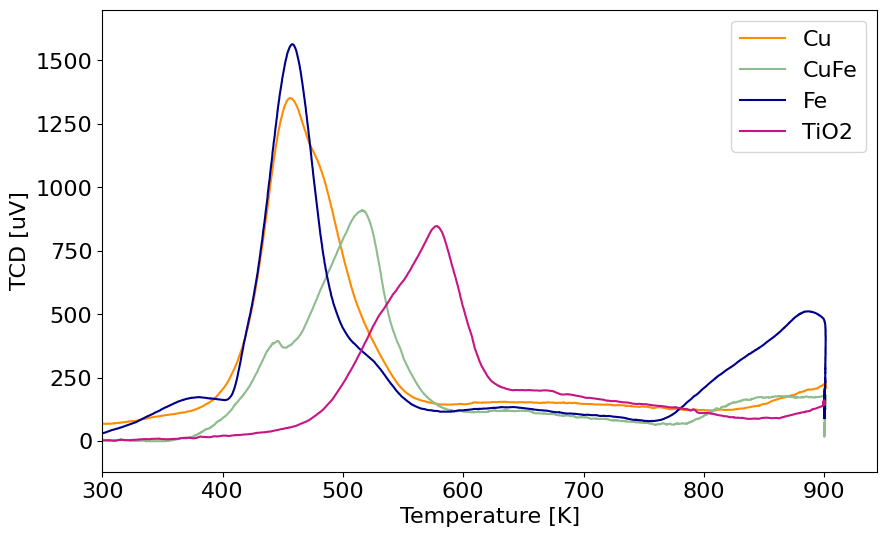

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def read_filter_and_trim_data(file_path, n):
    data = pd.read_csv(file_path, sep=",", header=0)
    print(f"Columns in {file_path}: {data.columns.tolist()}") 
    positive_data = data[data['TCD(uV)'] >= 0]
    return positive_data['Sample Temp(degree)'][n:], positive_data['TCD(uV)'][n:]

n = 30
colors = ['darkorange','tomato','darkseagreen','darkblue', 'steelblue','mediumvioletred']

file_path_Cu = 'csv/242003_Cu.csv'
file_path_CuFe = 'csv/TPR_CuFe_50-50.csv'
file_path_Fe = 'csv/242003_Fe.csv'
file_path_TiO2 = 'csv/242103_TiO2_no_metal.csv'

temp_Cu, tcd_Cu = read_filter_and_trim_data(file_path_Cu, n)
temp_CuFe, tcd_CuFe = read_filter_and_trim_data(file_path_CuFe, n)
temp_Fe, tcd_Fe = read_filter_and_trim_data(file_path_Fe, n)
temp_TiO2, tcd_TiO2 = read_filter_and_trim_data(file_path_TiO2, n)

plt.figure(figsize=(10, 6))
plt.plot(temp_Cu, tcd_Cu, label='Cu', color='darkorange')
plt.plot(temp_CuFe, tcd_CuFe, label='CuFe', color = 'darkseagreen')
plt.plot(temp_Fe, tcd_Fe, label='Fe', color='darkblue')
plt.plot(temp_TiO2, tcd_TiO2, label='TiO2', color = 'mediumvioletred')

#plt.title('TPR', fontsize=16)
plt.xlabel('Temperature [K]', fontsize=16)
plt.ylabel('TCD [uV]', fontsize=16)
plt.legend(fontsize=16)

plt.xlim(left=300)
plt.ylim(top=1700)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()
